In [10]:
import requests
import pandas as pd
import datetime

# Replace with your actual API key
API_KEY = '2f12c93906e6c3d041fd528d25ea628f'

def get_weather_data(city, days=5):
    url = f"http://api.openweathermap.org/data/2.5/forecast?q={city}&units=metric&cnt={days*8}&appid={API_KEY}"
    response = requests.get(url)
    data = response.json()
    
    # Extract relevant weather attributes
    weather_data = []
    for item in data['list']:
        weather_data.append({
            'datetime': datetime.datetime.fromtimestamp(item['dt']),
            'temperature': item['main']['temp'],
            'humidity': item['main']['humidity'],
            'wind_speed': item['wind']['speed'],
            'precipitation': item['pop']
        })
        
    # Convert to DataFrame
    df = pd.DataFrame(weather_data)
    return df

# Fetch weather data for a specific city
df = get_weather_data("London")
print(df.head())


             datetime  temperature  humidity  wind_speed  precipitation
0 2024-11-05 08:30:00        10.05        88        1.42              0
1 2024-11-05 11:30:00         9.94        86        0.90              0
2 2024-11-05 14:30:00        10.71        78        0.40              0
3 2024-11-05 17:30:00        14.15        60        0.81              0
4 2024-11-05 20:30:00        14.99        58        0.17              0


In [11]:
# Handle missing values by filling with mean values or dropping rows
df.fillna(df.mean(), inplace=True)

# Ensure the datetime column is in datetime format
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# Preview the cleaned data
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 40 entries, 2024-11-05 08:30:00 to 2024-11-10 05:30:00
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   temperature    40 non-null     float64
 1   humidity       40 non-null     int64  
 2   wind_speed     40 non-null     float64
 3   precipitation  40 non-null     int64  
dtypes: float64(2), int64(2)
memory usage: 1.6 KB
None
                     temperature  humidity  wind_speed  precipitation
datetime                                                             
2024-11-05 08:30:00        10.05        88        1.42              0
2024-11-05 11:30:00         9.94        86        0.90              0
2024-11-05 14:30:00        10.71        78        0.40              0
2024-11-05 17:30:00        14.15        60        0.81              0
2024-11-05 20:30:00        14.99        58        0.17              0


In [12]:
# Descriptive statistics
print("Average Temperature:", df['temperature'].mean())
print("Max Temperature:", df['temperature'].max())
print("Min Temperature:", df['temperature'].min())
print("Average Humidity:", df['humidity'].mean())


Average Temperature: 11.94075
Max Temperature: 15.75
Min Temperature: 8.74
Average Humidity: 78.725


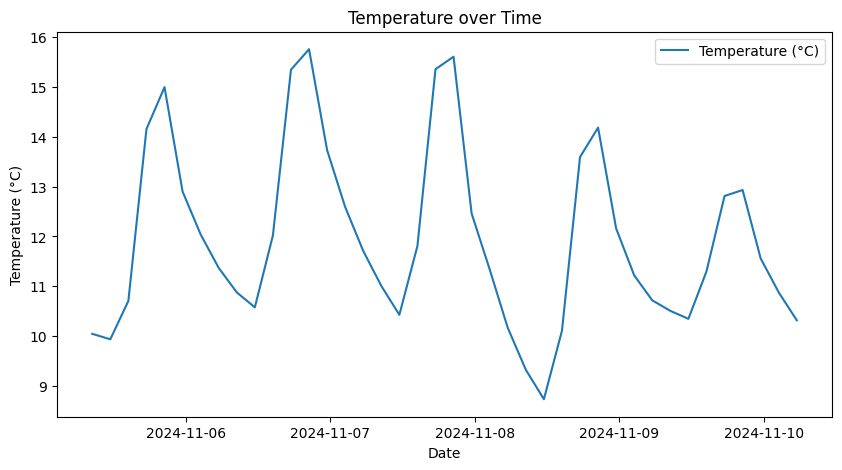

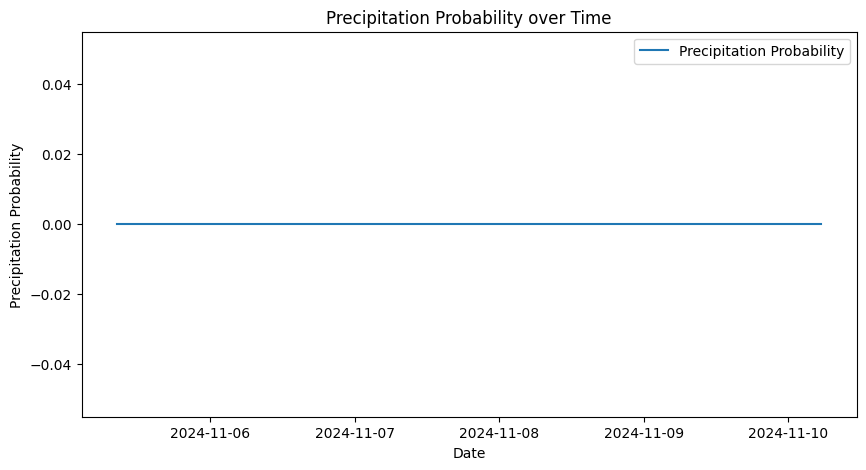

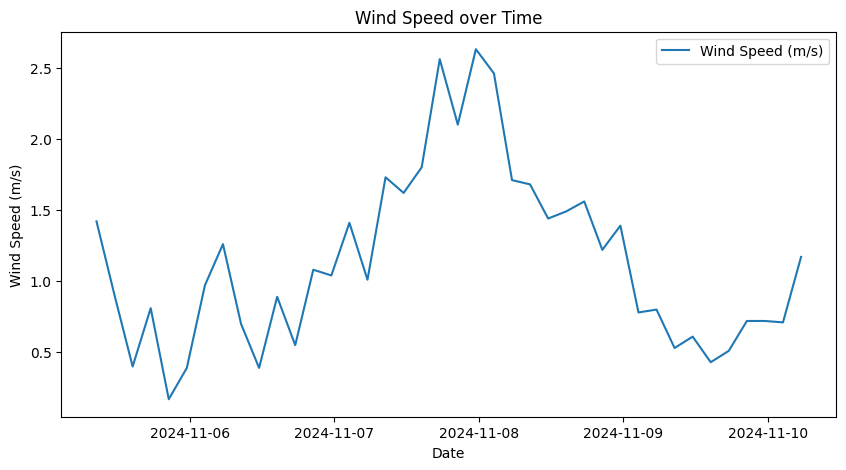

In [13]:
import matplotlib.pyplot as plt

# Temperature over time
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['temperature'], label='Temperature (°C)')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Temperature over Time')
plt.legend()
plt.show()

# Precipitation over time
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['precipitation'], label='Precipitation Probability')
plt.xlabel('Date')
plt.ylabel('Precipitation Probability')
plt.title('Precipitation Probability over Time')
plt.legend()
plt.show()

# Wind Speed over time
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['wind_speed'], label='Wind Speed (m/s)')
plt.xlabel('Date')
plt.ylabel('Wind Speed (m/s)')
plt.title('Wind Speed over Time')
plt.legend()
plt.show()


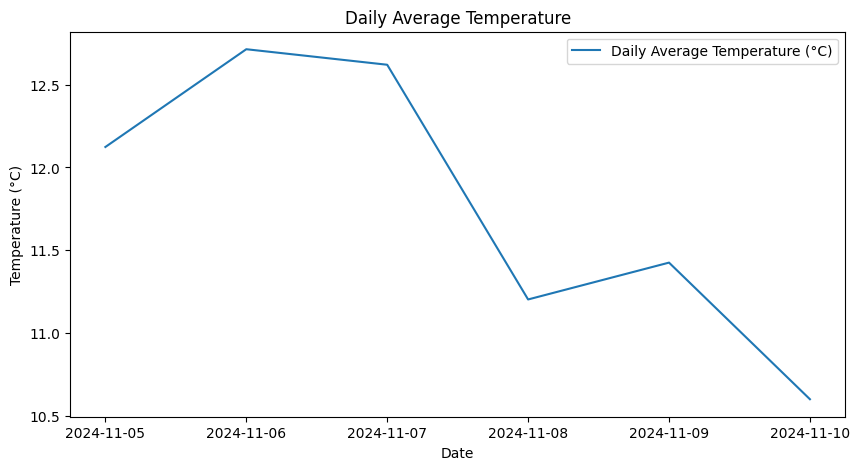

In [14]:
# Resample to daily average
daily_data = df.resample('D').mean()

# Plot daily average temperature
plt.figure(figsize=(10, 5))
plt.plot(daily_data.index, daily_data['temperature'], label='Daily Average Temperature (°C)')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Daily Average Temperature')
plt.legend()
plt.show()


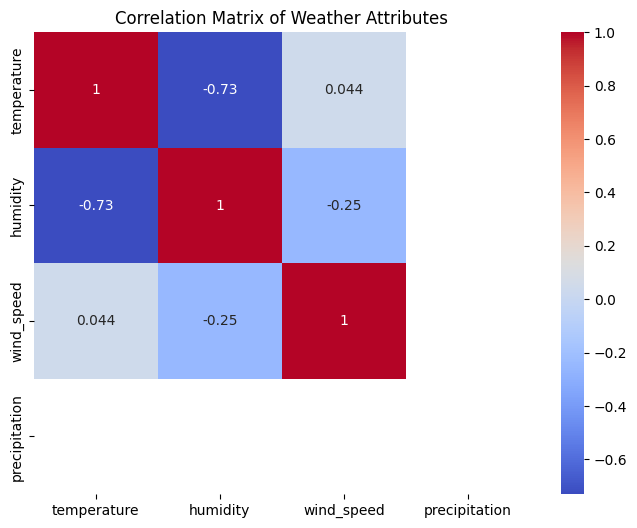

In [15]:
import seaborn as sns

# Correlation matrix
correlation_matrix = df.corr()

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Weather Attributes")
plt.show()


In [17]:
import folium

# Initialize map centered around the city
map_center = [51.509865, -0.118092]  # Coordinates for London
weather_map = folium.Map(location=map_center, zoom_start=10)

# Adding temperature markers on the map
for _, row in df.iterrows():
    folium.Marker(
        [map_center[0], map_center[1]],
        popup=f"Temp: {row['temperature']}°C\nHumidity: {row['humidity']}%\nWind Speed: {row['wind_speed']}m/s",
    ).add_to(weather_map)

# Display the map
weather_map.save("weather_map.html")
